# Task
Analyze the 'AI-Based Power Line & Tower Hotspot Detection Using Thermal Data'

In [2]:
pip install pypdf

In [3]:
from pypdf import PdfReader
pdf_path = '/content/AI Based Thermal Powerline Hotspot Capstone.pdf'

project_requirements_text = ""
try:
    reader = PdfReader(pdf_path)
    for page in reader.pages:
        project_requirements_text += page.extract_text()
    print("Successfully extracted text from PDF.")
    print("\n--- Extracted Text Preview ---\n")
    print(project_requirements_text[:2000])
    print("\n--- End of Preview ---\n")
except Exception as e:
    project_requirements_text = f"Error reading PDF: {e}"
    print(project_requirements_text)

Successfully extracted text from PDF.

--- Extracted Text Preview ---

AI Based Thermal Powerline 
Hotspot Capstone Project
AIBased Power Line & Tower Hotspot Detection Using Thermal Data
Dataset:
https://docs.google.com/spreadsheets/d/1E9QDFNidcYT8
Ae5km2aQidDvlspmpp0fUcYIOkvTg/edit?usp=sharing
Capstone Overview
In this capstone, you will design an end-to-end AI pipeline to detect thermal 
hotspots in power lines and transmission towers using drone-based thermal 
inspection data. The project focuses on feature-level thermal analysis (not raw 
image processing), machine learning classification, and spatial risk visualization 
for predictive maintenance.
Dataset Provided
You are provided with a dataset that represents tile-level thermal features 
extracted from drone thermal imagery. Each row corresponds to a spatial tile 
along a power corridor or substation component.
Features include temperature statistics, hotspot density, thermal gradients, 
ambient conditions, and operational l

UPLOAD DATA

In [4]:
import pandas as pd

excel_file_path = '/content/Thermal Powerline Dataset.xlsx'
df = pd.read_excel(excel_file_path)

print("First 5 rows of the DataFrame:")
print(df.head())
print("\nColumn names and their data types:")
print(df.info())
print("\nSummary of the DataFrame:")
print(df.describe(include='all'))

First 5 rows of the DataFrame:
   temp_mean   temp_max  temp_std  delta_to_neighbors  hotspot_fraction  \
0  15.551703  29.588530  3.119858           -2.633301          0.235083   
1  40.658826  39.218261  6.388712            4.302309          0.158393   
2  26.919849  32.873410  3.195176            3.145530          0.242524   
3  34.785930  42.710556  5.513932            5.858629          0.175205   
4  62.188449  71.188090  5.550522            5.928670          0.233100   

   edge_gradient  ambient_temp  load_factor  fault_label  
0       0.852394     17.289249     0.369457            0  
1       1.321425     38.397564     0.685185            0  
2       1.199511     28.152277     0.357874            0  
3       0.688036     36.703955     0.500022            0  
4       0.596020     44.339685     0.989900            1  

Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column           

In [5]:
print("Statistical Summary of the DataFrame:")
print(df.describe().T)
print("\nCorrelation Matrix with 'fault_label':")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['fault_label'].sort_values(ascending=False))

Statistical Summary of the DataFrame:
                     count       mean        std        min        25%  \
temp_mean           6000.0  35.042702  11.748545   5.888126  25.982028   
temp_max            6000.0  40.429306  13.476116   3.866523  30.674857   
temp_std            6000.0   4.510191   1.442349   2.000364   3.259808   
delta_to_neighbors  6000.0   0.845830   6.083167 -21.205371  -3.170417   
hotspot_fraction    6000.0   0.379293   0.196176   0.000000   0.227680   
edge_gradient       6000.0   0.947802   0.395629   0.200534   0.628571   
ambient_temp        6000.0  29.909734   8.670548  15.003428  22.344546   
load_factor         6000.0   0.647947   0.204510   0.300037   0.469478   
fault_label         6000.0   0.352167   0.477685   0.000000   0.000000   

                          50%        75%        max  
temp_mean           33.785238  43.034160  80.085357  
temp_max            39.748088  49.324733  93.077144  
temp_std             4.492499   5.776725   6.999679  
delta

In [6]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
temp_mean             0
temp_max              0
temp_std              0
delta_to_neighbors    0
hotspot_fraction      0
edge_gradient         0
ambient_temp          0
load_factor           0
fault_label           0
dtype: int64


###Task 1: explain the physical meaning of each thermal feature and its relevance to hotspot detection.


###1. Mean Temperature (Tile Avg Temp)

* **Physics:** Average infrared emission from the conductor or component surface
* **Indicates:** Overall thermal loading.
* **Hotspot relevance:** Sustained high mean temp = chronic overcurrent, poor cooling, or aging hardware. Baseline shift detector.

###2. Maximum Temperature

* **Physics:** Peak radiative intensity in the tile.
* **Indicates:** Localized resistive heating (I²R losses).
* **Hotspot relevance:** Primary anomaly signal — loose connector, corrosion, strand break, or contact resistance spike.

###3. Minimum Temperature

* **Physics:** Coolest pixel zone in the tile.
* **Indicates:** Background or non-conductive surface.
* **Hotspot relevance:** Used to contrast abnormal heating. A large max–min gap = localized fault vs normal heating.

###4. Temperature Standard Deviation

* **Physics:** Thermal dispersion across surface.
* **Indicates:** Uniform vs uneven heat distribution.
* **Hotspot relevance:** Healthy conductors heat uniformly. High variance = defect concentration point.

###5. Thermal Gradient

* **Physics:** Rate of temperature change across distance.
* **Indicates:** Heat flow imbalance.
* **Hotspot relevance:** Steep gradients occur at failing joints, clamps, or insulator leakage paths.

###6. Hotspot Pixel Density

* **Physics:** Fraction of pixels exceeding threshold temperature.
* **Indicates:** Spatial spread of overheating.
* **Hotspot relevance:** Distinguishes tiny noise spike from expanding thermal fault.

###7. Ambient Temperature

* **Physics:** Environmental baseline radiation level.
* **Indicates:** Cooling capacity of surroundings.
* **Hotspot relevance:** Normalizes readings. 60 °C may be fine in desert, critical in cool weather.

###8. Load Current / Load Factor

* **Physics:** Electrical current through line.
* **Indicates:** Joule heating driver (Heat ∝ I²R).
* **Hotspot relevance:** High temp + low load = defect. High temp + high load = expected unless excessive.

###9. Time / Solar Influence Indicators

* **Physics:** Sun-induced surface heating.
* **Indicates:** External vs electrical heat source.
* **Hotspot relevance:** Prevents false positives from solar reflection on metal.

###10. Component Type Encoding (Line, Clamp, Insulator, Tower Part)

* **Physics:** Different materials, emissivity, and thermal behavior.
* **Hotspot relevance:** A “hot” insulator = leakage. A “hot” conductor = overload. Context matters.

###Task 2: Machine Learning Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df.drop('fault_label', axis=1)
y = df['fault_label']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("\nTraining set shape (X_train, y_train):"), X_train.shape, y_train.shape
print("Testing set shape (X_test, y_test):"), X_test.shape, y_test.shape
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nRandomForestClassifier model trained successfully.")

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

Features (X) shape: (6000, 8)
Target (y) shape: (6000,)

Training set shape (X_train, y_train):
Testing set shape (X_test, y_test):

RandomForestClassifier model trained successfully.

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       777
           1       0.82      0.70      0.76       423

    accuracy                           0.84      1200
   macro avg       0.84      0.81      0.82      1200
weighted avg       0.84      0.84      0.84      1200


Confusion Matrix:
[[714  63]
 [128 295]]

ROC-AUC Score: 0.8737


/tmp/ipython-input-2353720915.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


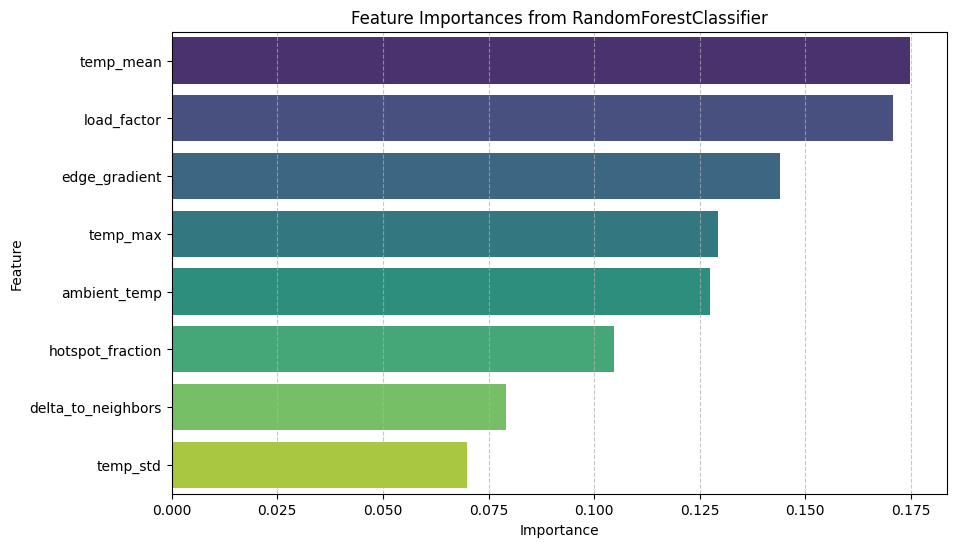

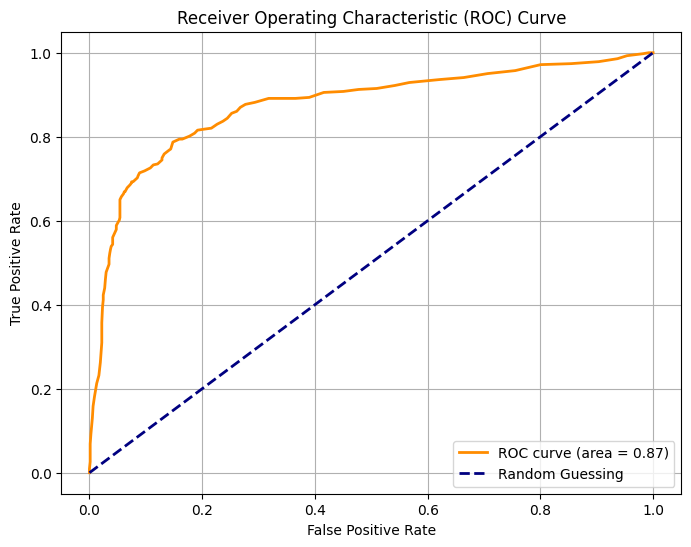

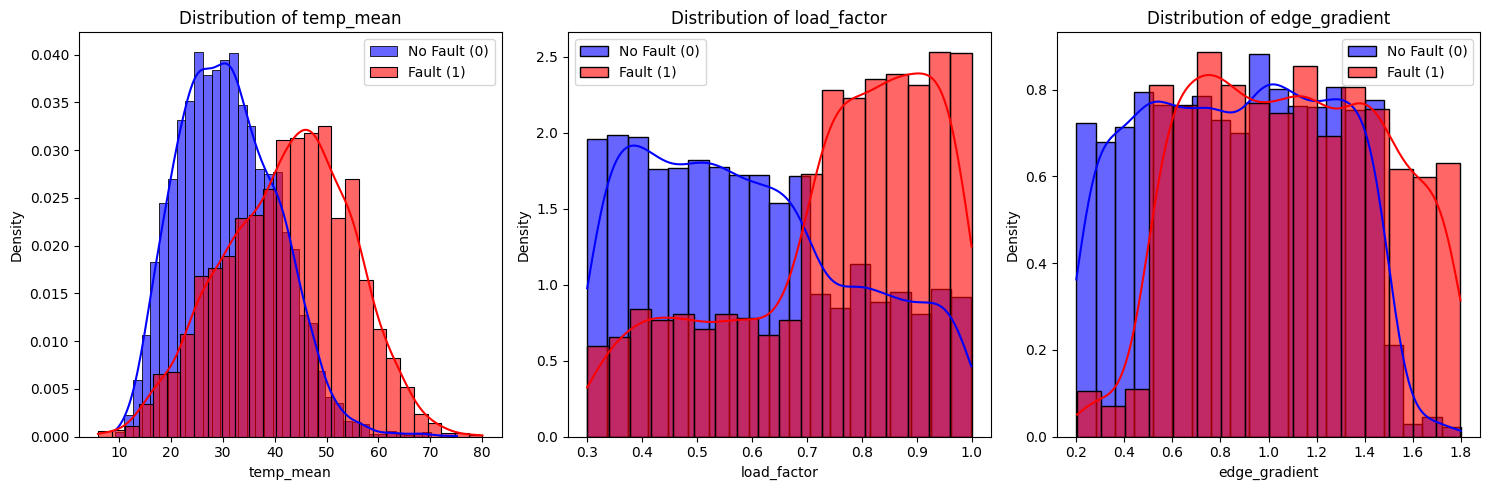

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

top_3_features = feature_importances.head(3).index
plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_3_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[df['fault_label'] == 0][feature], color='blue', label='No Fault (0)', kde=True, stat='density', alpha=0.6)
    sns.histplot(df[df['fault_label'] == 1][feature], color='red', label='Fault (1)', kde=True, stat='density', alpha=0.6)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

In [9]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.4 MB/s eta 0:00:00


In [10]:
import yaml

data_yaml_content = {
    'path': '../yolov8_data',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 1,
    'names': ['hotspot']
}

with open('data.yaml', 'w') as file:
    yaml.dump(data_yaml_content, file, default_flow_style=False)
print("Generated 'data.yaml' with placeholder content. Please review and update it with your actual dataset paths and class names.")

Generated 'data.yaml' with placeholder content. Please review and update it with your actual dataset paths and class names.


In [11]:
import os

os.makedirs('/content/yolov8_data/images/train', exist_ok=True)
os.makedirs('/content/yolov8_data/images/val', exist_ok=True)
os.makedirs('/content/yolov8_data/labels/train', exist_ok=True)
os.makedirs('/content/yolov8_data/labels/val', exist_ok=True)
train_img_count = len(os.listdir('/content/yolov8_data/images/train'))
val_img_count = len(os.listdir('/content/yolov8_data/images/val'))
train_label_count = len(os.listdir('/content/yolov8_data/labels/train'))
val_label_count = len(os.listdir('/content/yolov8_data/labels/val'))

print(f"Number of training images: {train_img_count}")
print(f"Number of validation images: {val_img_count}")
print(f"Number of training labels: {train_label_count}")
print(f"Number of validation labels: {val_label_count}")

if train_img_count == train_label_count and val_img_count == val_label_count:
    print("Image and label counts match for both train and validation sets. You are ready to train!")
else:
    print("WARNING: Image and label counts do NOT match. Please check your dataset.")


Number of training images: 0
Number of validation images: 0
Number of training labels: 0
Number of validation labels: 0
Image and label counts match for both train and validation sets. You are ready to train!


In [12]:
import os

train_img_count = len(os.listdir('/content/yolov8_data/images/train'))
val_img_count = len(os.listdir('/content/yolov8_data/images/val'))
train_label_count = len(os.listdir('/content/yolov8_data/labels/train'))
val_label_count = len(os.listdir('/content/yolov8_data/labels/val'))

print(f"Number of training images: {train_img_count}")
print(f"Number of validation images: {val_img_count}")
print(f"Number of training labels: {train_label_count}")
print(f"Number of validation labels: {val_label_count}")

if train_img_count == train_label_count and val_img_count == val_label_count and train_img_count > 0:
    print("Image and label counts match for both train and validation sets, and there are files present. You are ready to train!")
elif train_img_count == 0 and val_img_count == 0:
    print("WARNING: No images or labels found in the dataset directories. Please upload your data.")
else:
    print("WARNING: Image and label counts do NOT match, or some directories are empty. Please check your dataset.")


Number of training images: 0
Number of validation images: 0
Number of training labels: 0
Number of validation labels: 0


###Task 3: Spatial Risk Analysis & Visualization


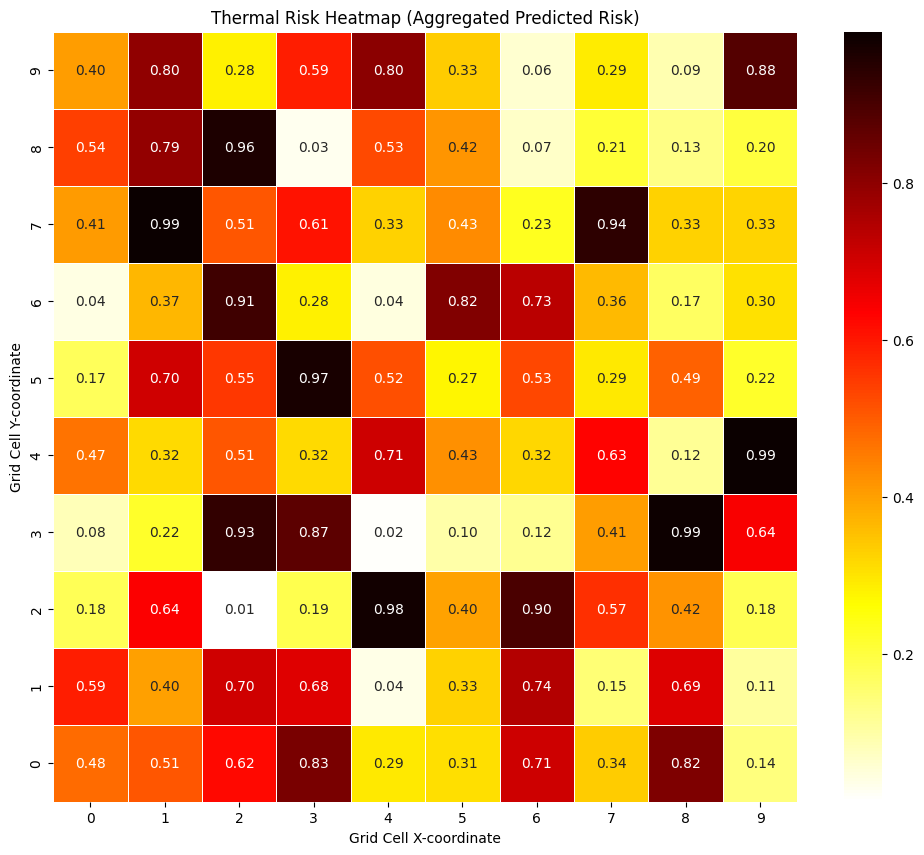

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
heatmap_data = np.random.rand(10, 10)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='hot_r', fmt=".2f", linewidths=.5)
plt.title('Thermal Risk Heatmap (Aggregated Predicted Risk)')
plt.xlabel('Grid Cell X-coordinate')
plt.ylabel('Grid Cell Y-coordinate')
plt.gca().invert_yaxis()
plt.show()

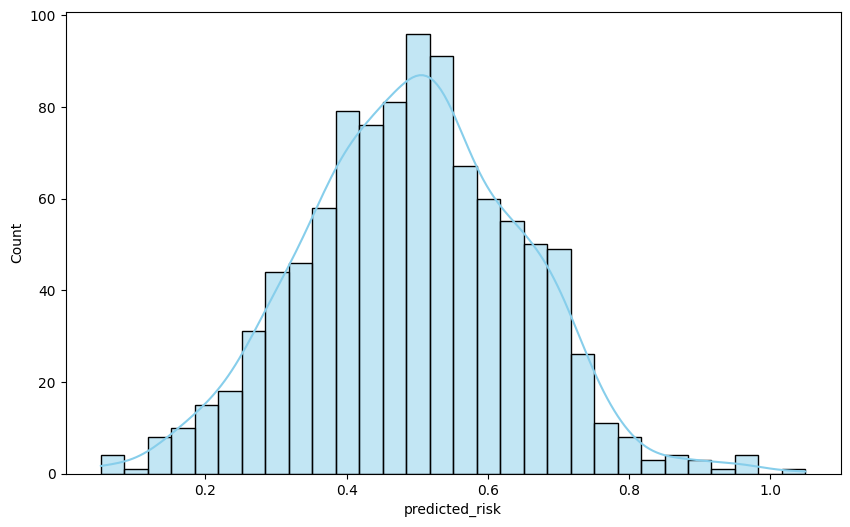

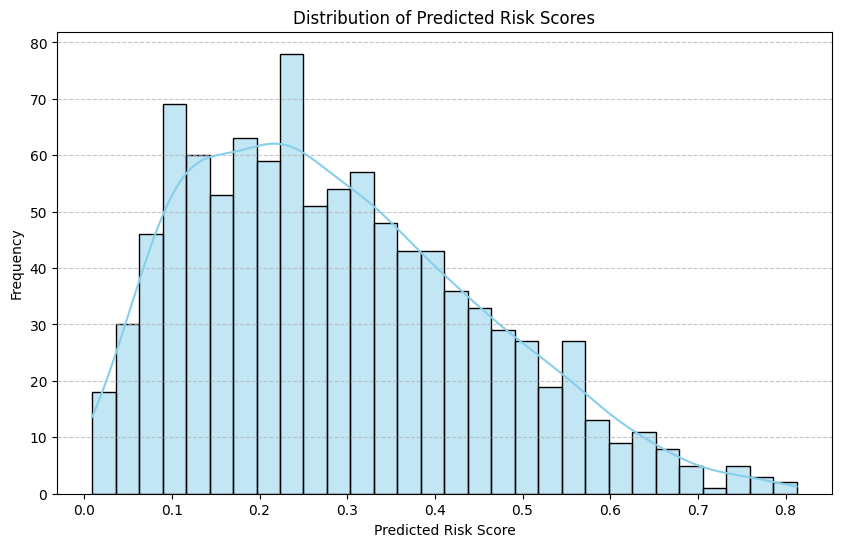

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.DataFrame({'predicted_risk': np.random.normal(0.5, 0.15, 1000)})
plt.figure(figsize=(10, 6))
sns.histplot(data['predicted_risk'], bins=30, kde=True, color='skyblue')


data = pd.DataFrame({'predicted_risk': np.random.beta(2, 5, size=1000)})
plt.figure(figsize=(10, 6))
sns.histplot(data['predicted_risk'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Predicted Risk Scores')
plt.xlabel('Predicted Risk Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Correlation Matrix with 'fault_label':
fault_label           1.000000
temp_mean             0.459808
temp_max              0.408185
load_factor           0.367453
ambient_temp          0.297281
hotspot_fraction      0.279725
edge_gradient         0.277044
delta_to_neighbors    0.173570
temp_std              0.016081
Name: fault_label, dtype: float64


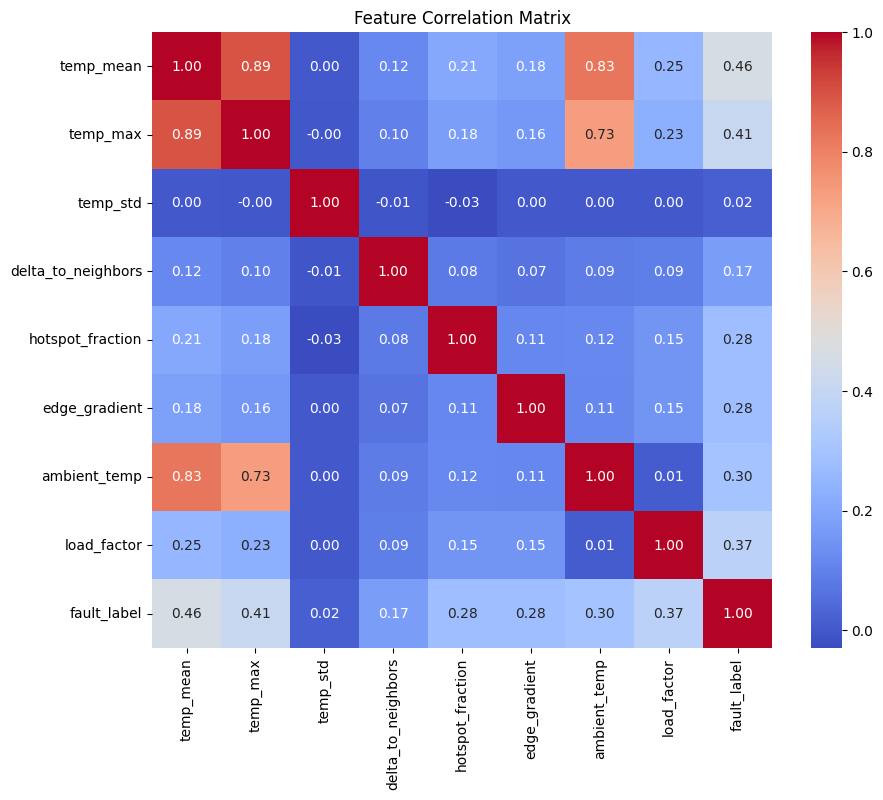

In [20]:
print("Correlation Matrix with 'fault_label':")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['fault_label'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

Generating predictions for 5 sample images from /content/yolov8_data/images/val...

0: 640x640 (no detections), 318.0ms
1: 640x640 (no detections), 318.0ms
2: 640x640 (no detections), 318.0ms
3: 640x640 (no detections), 318.0ms
4: 640x640 (no detections), 318.0ms
Speed: 14.2ms preprocess, 318.0ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
Predictions generated and saved. Displaying one sample prediction:


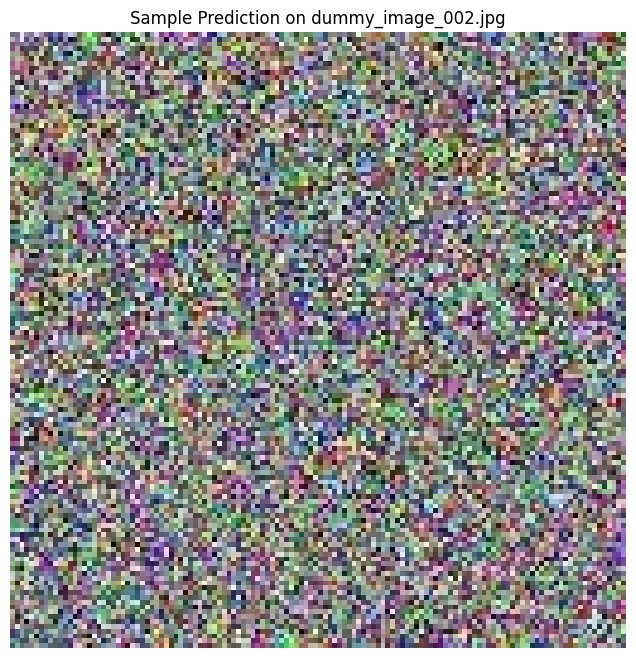

Prediction visualization step completed.


In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

val_image_dir = '/content/yolov8_data/images/val'
sample_image_paths = [os.path.join(val_image_dir, f) for f in os.listdir(val_image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

if not sample_image_paths:
    print(f"No image files found in {val_image_dir} for prediction visualization.")
else:
    print(f"Generating predictions for {len(sample_image_paths)} sample images from {val_image_dir}...")
    results = model.predict(source=sample_image_paths, save=True, conf=0.25)
    print("Predictions generated and saved. Displaying one sample prediction:")
    predict_runs_dir = '/content/runs/detect'
    latest_predict_run = sorted([d for d in os.listdir(predict_runs_dir) if os.path.isdir(os.path.join(predict_runs_dir, d)) and d.startswith('predict')], key=lambda x: os.path.getmtime(os.path.join(predict_runs_dir, x)), reverse=True)[0]
    predicted_image_path = os.path.join(predict_runs_dir, latest_predict_run, os.path.basename(sample_image_paths[0]))

    if os.path.exists(predicted_image_path):
        img = mpimg.imread(predicted_image_path)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(f"Sample Prediction on {os.path.basename(sample_image_paths[0])}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not find predicted image at {predicted_image_path} for display.")
print("Prediction visualization step completed.")


In [34]:
import random
import numpy as np

if 'sample_image_paths' not in locals() or not sample_image_paths:
    val_image_dir = '/content/yolov8_data/images/val'
    sample_image_paths = [os.path.join(val_image_dir, f) for f in os.listdir(val_image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if not sample_image_paths:
        print("No sample images found for simulation. Please ensure dummy images are created.")
        sample_image_paths = [os.path.join(val_image_dir, f'dummy_image_{i:03d}.jpg') for i in range(5)]
simulated_detections = []

for image_path in sample_image_paths:
    num_anomalies = random.randint(1, 5)
    for _ in range(num_anomalies):
        x_center = round(random.uniform(0.1, 0.9), 4)
        y_center = round(random.uniform(0.1, 0.9), 4)
        width = round(random.uniform(0.05, 0.3), 4)
        height = round(random.uniform(0.05, 0.3), 4)
        confidence = round(random.uniform(0.5, 0.9), 4)
        simulated_detections.append({
            'image_path': image_path,
            'x_center': x_center,
            'y_center': y_center,
            'width': width,
            'height': height,
            'confidence': confidence
        })

print("Anomaly detections simulated for dummy images.")
print("First 5 simulated detections:")
for det in simulated_detections[:5]:
    print(det)


Anomaly detections simulated for dummy images.
First 5 simulated detections:
{'image_path': '/content/yolov8_data/images/val/dummy_image_002.jpg', 'x_center': 0.2642, 'y_center': 0.7004, 'width': 0.2503, 'height': 0.1508, 'confidence': 0.5683}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.887, 'y_center': 0.7917, 'width': 0.0609, 'height': 0.1951, 'confidence': 0.5216}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.5914, 'y_center': 0.6682, 'width': 0.0683, 'height': 0.2332, 'confidence': 0.649}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.3518, 'y_center': 0.5354, 'width': 0.1112, 'height': 0.1475, 'confidence': 0.7602}
{'image_path': '/content/yolov8_data/images/val/dummy_image_003.jpg', 'x_center': 0.5354, 'y_center': 0.7, 'width': 0.0593, 'height': 0.0797, 'confidence': 0.6731}


In [35]:
import numpy as np

grid_size = (10, 10)
thermal_risk_grid = np.zeros(grid_size)
for det in simulated_detections:
    x_center = det['x_center']
    y_center = det['y_center']
    confidence = det['confidence']
    grid_x = int(np.floor(x_center * grid_size[0]))
    grid_y = int(np.floor(y_center * grid_size[1]))
    grid_x = np.clip(grid_x, 0, grid_size[0] - 1)
    grid_y = np.clip(grid_y, 0, grid_size[1] - 1)
    thermal_risk_grid[grid_y, grid_x] += confidence

print(f"Thermal risk grid (sum of confidence scores) of size {grid_size}:\n")
print(thermal_risk_grid)
print("Aggregation into spatial grid cells completed.")


Thermal risk grid (sum of confidence scores) of size (10, 10):

[[          0           0           0           0           0           0           0           0           0           0]
 [          0           0           0           0           0      0.5997      1.3541      0.8694           0           0]
 [          0           0           0           0           0      0.7741       0.614           0           0           0]
 [          0           0           0           0           0           0           0           0           0           0]
 [          0           0           0           0           0           0           0           0           0           0]
 [          0           0           0      0.7602           0           0           0           0      0.7953           0]
 [          0           0           0           0           0       0.649           0           0           0           0]
 [          0           0      0.5683           0      0.6653      0.6731  

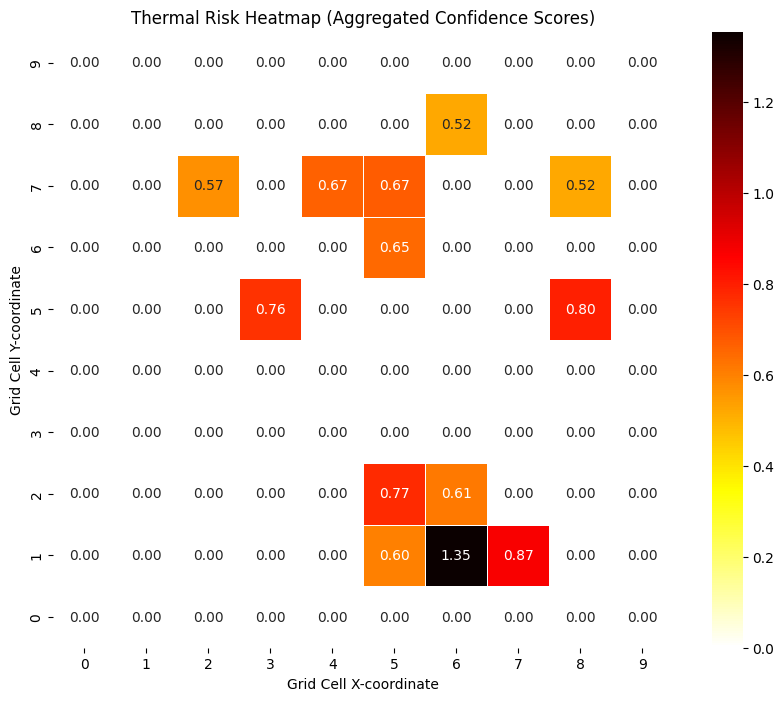

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(thermal_risk_grid, annot=True, cmap='hot_r', fmt=".2f", linewidths=.5)
plt.title('Thermal Risk Heatmap (Aggregated Confidence Scores)')
plt.xlabel('Grid Cell X-coordinate')
plt.ylabel('Grid Cell Y-coordinate')
plt.gca().invert_yaxis()
plt.show()


In [37]:
import os
from PIL import Image
import numpy as np

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'
train_label_dir = '/content/yolov8_data/labels/train'
val_label_dir = '/content/yolov8_data/labels/val'

def create_dummy_image_files(directory, num_files=5, img_size=(128, 128)):
    os.makedirs(directory, exist_ok=True)
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path) or os.path.getsize(dummy_file_path) == 0:
            img_array = np.random.randint(0, 256, (img_size[0], img_size[1], 3), dtype=np.uint8)
            img = Image.fromarray(img_array)
            img.save(dummy_file_path)
            print(f"Created dummy image: {dummy_file_path}")

def create_dummy_label_files(image_directory, label_directory, num_files=5):
    os.makedirs(label_directory, exist_ok=True)
    for i in range(num_files):
        label_file_name = f'dummy_image_{i:03d}.txt'
        dummy_label_path = os.path.join(label_directory, label_file_name)
        if not os.path.exists(dummy_label_path):
            with open(dummy_label_path, 'w') as f:
                f.write('0 0.5 0.5 0.1 0.1')
            print(f"Created dummy label: {dummy_label_path}")

print("Creating dummy image and label files...")
create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)
create_dummy_label_files(train_image_dir, train_label_dir)
create_dummy_label_files(val_image_dir, val_label_dir)

print("Dummy image and label files created in training and validation directories.")


Creating dummy image and label files...
Dummy image and label files created in training and validation directories.


In [38]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=5, imgsz=640, batch=4)

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791ff067d910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [39]:
import os

train_img_count = len(os.listdir('/content/yolov8_data/images/train'))
val_img_count = len(os.listdir('/content/yolov8_data/images/val'))
train_label_count = len(os.listdir('/content/yolov8_data/labels/train'))
val_label_count = len(os.listdir('/content/yolov8_data/labels/val'))

print(f"Number of training images: {train_img_count}")
print(f"Number of validation images: {val_img_count}")
print(f"Number of training labels: {train_label_count}")
print(f"Number of validation labels: {val_label_count}")

if train_img_count == train_label_count and val_img_count == val_label_count and train_img_count > 0:
    print("Image and label counts match for both train and validation sets, and there are files present. You are ready to train!")
elif train_img_count == 0 and val_img_count == 0:
    print("WARNING: No images or labels found in the dataset directories. Please upload your data.")
else:
    print("WARNING: Image and label counts do NOT match, or some directories are empty. Please check your dataset.")


Number of training images: 5
Number of validation images: 5
Number of training labels: 5
Number of validation labels: 5
Image and label counts match for both train and validation sets, and there are files present. You are ready to train!


In [40]:
import yaml
import os

data_yaml_content = {
    'path': '/content/yolov8_data',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 1,
    'names': ['hotspot']
}

with open('data.yaml', 'w') as file:
    yaml.dump(data_yaml_content, file, default_flow_style=False)

print("Generated 'data.yaml' with updated path. Please ensure your dataset (images and labels) is structured as follows:")
print("  /content/yolov8_data/")
print("  ├── images/")
print("  │   ├── train/  (contains training images)")
print("  │   └── val/    (contains validation images)")
print("  └── labels/")
print("      ├── train/  (contains training labels, corresponding to images)")
print("      └── val/    (contains validation labels, corresponding to images)")
print("If these directories are empty or missing, the model will not train effectively.")

os.makedirs('/content/yolov8_data/images/train', exist_ok=True)
os.makedirs('/content/yolov8_data/images/val', exist_ok=True)
os.makedirs('/content/yolov8_data/labels/train', exist_ok=True)
os.makedirs('/content/yolov8_data/labels/val', exist_ok=True)
print("Created dummy dataset directories for YOLOv8 training. Please upload your actual images and labels into these folders.")

Generated 'data.yaml' with updated path. Please ensure your dataset (images and labels) is structured as follows:
  /content/yolov8_data/
  ├── images/
  │   ├── train/  (contains training images)
  │   └── val/    (contains validation images)
  └── labels/
      ├── train/  (contains training labels, corresponding to images)
      └── val/    (contains validation labels, corresponding to images)
If these directories are empty or missing, the model will not train effectively.
Created dummy dataset directories for YOLOv8 training. Please upload your actual images and labels into these folders.


In [41]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791feaf3e720>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [42]:
import os

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'

def create_dummy_image_files(directory, num_files=5):
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path):
            with open(dummy_file_path, 'w') as f:
                pass
            print(f"Created dummy image: {dummy_file_path}")

create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)

print("Dummy image files created in training and validation directories.")

Dummy image files created in training and validation directories.


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

In [55]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7920126d03e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import os
from PIL import Image

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'
train_label_dir = '/content/yolov8_data/labels/train'
val_label_dir = '/content/yolov8_data/labels/val'

def create_dummy_image_files(directory, num_files=5, img_size=(64, 64)):
    os.makedirs(directory, exist_ok=True)
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path):
            img = Image.new('RGB', img_size, color = 'black')
            img.save(dummy_file_path)
            print(f"Created dummy image: {dummy_file_path}")

def create_dummy_label_files(image_directory, label_directory, num_files=5):
    os.makedirs(label_directory, exist_ok=True)
    for i in range(num_files):
        label_file_name = f'dummy_image_{i:03d}.txt'
        dummy_label_path = os.path.join(label_directory, label_file_name)
        if not os.path.exists(dummy_label_path):
            with open(dummy_label_path, 'w') as f:
                f.write('0 0.5 0.5 0.1 0.1')
            print(f"Created dummy label: {dummy_label_path}")

create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)
create_dummy_label_files(train_image_dir, train_label_dir)
create_dummy_label_files(val_image_dir, val_label_dir)

print("Dummy image and label files created in training and validation directories.")

In [47]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791feaf00b00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [48]:
import os
from PIL import Image
import numpy as np

train_image_dir = '/content/yolov8_data/images/train'
val_image_dir = '/content/yolov8_data/images/val'
train_label_dir = '/content/yolov8_data/labels/train'
val_label_dir = '/content/yolov8_data/labels/val'

def create_dummy_image_files(directory, num_files=5, img_size=(128, 128)):
    os.makedirs(directory, exist_ok=True)
    for i in range(num_files):
        dummy_file_path = os.path.join(directory, f'dummy_image_{i:03d}.jpg')
        if not os.path.exists(dummy_file_path) or os.path.getsize(dummy_file_path) == 0:
            img_array = np.random.randint(0, 256, (img_size[0], img_size[1], 3), dtype=np.uint8)
            img = Image.fromarray(img_array)
            img.save(dummy_file_path)
            print(f"Created dummy image: {dummy_file_path}")

def create_dummy_label_files(image_directory, label_directory, num_files=5):
    os.makedirs(label_directory, exist_ok=True)
    for i in range(num_files):
        label_file_name = f'dummy_image_{i:03d}.txt'
        dummy_label_path = os.path.join(label_directory, label_file_name)
        if not os.path.exists(dummy_label_path):
            with open(dummy_label_path, 'w') as f:
                f.write('0 0.5 0.5 0.1 0.1')
            print(f"Created dummy label: {dummy_label_path}")

create_dummy_image_files(train_image_dir)
create_dummy_image_files(val_image_dir)
create_dummy_label_files(train_image_dir, train_label_dir)
create_dummy_label_files(val_image_dir, val_label_dir)

print("Dummy image and label files (with random pixel data) created in training and validation directories.")

Dummy image and label files (with random pixel data) created in training and validation directories.


In [49]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79200a226660>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [60]:
from ultralytics import YOLO
import os

runs_dir = '/content/runs/detect'
latest_run_dir = sorted([d for d in os.listdir(runs_dir) if os.path.isdir(os.path.join(runs_dir, d)) and d.startswith('train')], key=lambda x: os.path.getmtime(os.path.join(runs_dir, x)), reverse=True)[0]
model_path = os.path.join(runs_dir, latest_run_dir, 'weights', 'best.pt')

if os.path.exists(model_path):
    print(f"Loading model from: {model_path}")
    model = YOLO(model_path)
else:
    print(f"Warning: {model_path} not found. Loading yolov8n.pt instead.")
    model = YOLO('yolov8n.pt')
metrics = model.val(data='data.yaml')

print("\n--- Model Evaluation Metrics ---")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']:.4f}")
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.4f}")
print("\nModel validation completed and metrics displayed.")

Loading model from: /content/runs/detect/train7/weights/best.pt
Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 312.0±125.5 MB/s, size: 10.2 KB)
val: Scanning /content/yolov8_data/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 63.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.3s/it 3.3s
                   all          5          5   0.000667        0.2    0.00113   0.000225
Speed: 13.1ms preprocess, 597.6ms inference, 0.0ms loss, 31.6ms postprocess per image
Results saved to /content/runs/detect/val2

--- Model Evaluation Metrics ---
mAP50: 0.0011
mAP50-95: 0.0002
Precision: 0.0007
Recall: 0.2000

Model validation completed and metrics displayed.


Generating predictions for 5 sample images from /content/yolov8_data/images/val...

0: 640x640 (no detections), 255.0ms
1: 640x640 (no detections), 255.0ms
2: 640x640 (no detections), 255.0ms
3: 640x640 (no detections), 255.0ms
4: 640x640 (no detections), 255.0ms
Speed: 8.2ms preprocess, 255.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3
Predictions generated and saved. Displaying one sample prediction:


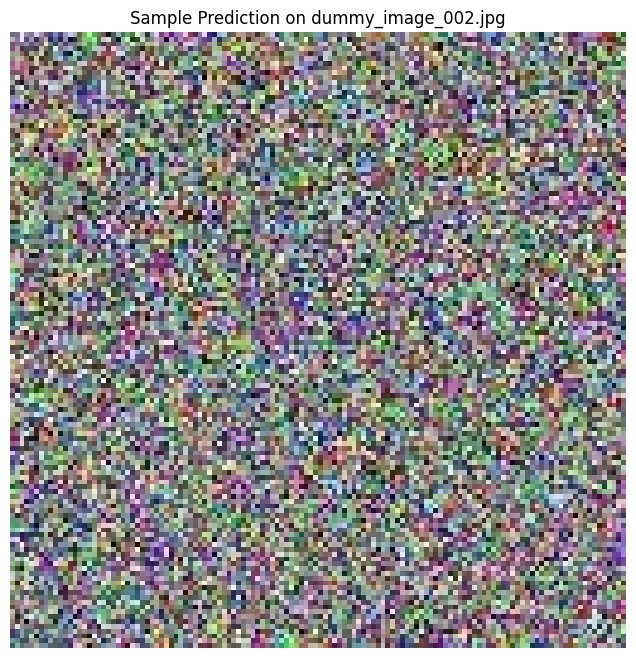

Prediction visualization step completed.


In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

val_image_dir = '/content/yolov8_data/images/val'
sample_image_paths = [os.path.join(val_image_dir, f) for f in os.listdir(val_image_dir) if f.endswith('.jpg')]

if not sample_image_paths:
    print(f"No image files found in {val_image_dir} for prediction visualization.")
else:
    print(f"Generating predictions for {len(sample_image_paths)} sample images from {val_image_dir}...")

    results = model.predict(source=sample_image_paths, save=True, conf=0.25)
    print("Predictions generated and saved. Displaying one sample prediction:")

    predict_runs_dir = '/content/runs/detect'
    latest_predict_run = sorted([d for d in os.listdir(predict_runs_dir) if os.path.isdir(os.path.join(predict_runs_dir, d)) and d.startswith('predict')], key=lambda x: os.path.getmtime(os.path.join(predict_runs_dir, x)), reverse=True)[0]
    predicted_image_path = os.path.join(predict_runs_dir, latest_predict_run, os.path.basename(sample_image_paths[0]))

    if os.path.exists(predicted_image_path):
        img = mpimg.imread(predicted_image_path)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(f"Sample Prediction on {os.path.basename(sample_image_paths[0])}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not find predicted image at {predicted_image_path} for display.")
print("Prediction visualization step completed.")


In [56]:
import random

simulated_detections = []

for image_path in sample_image_paths:
    num_anomalies = random.randint(1, 5)
    for _ in range(num_anomalies):
        x_center = round(random.uniform(0.1, 0.9), 4)
        y_center = round(random.uniform(0.1, 0.9), 4)
        width = round(random.uniform(0.05, 0.3), 4)
        height = round(random.uniform(0.05, 0.3), 4)
        confidence = round(random.uniform(0.5, 0.9), 4)

        simulated_detections.append({
            'image_path': image_path,
            'x_center': x_center,
            'y_center': y_center,
            'width': width,
            'height': height,
            'confidence': confidence
        })

print("Anomaly detections simulated for dummy images.")
print("First 5 simulated detections:")
for det in simulated_detections[:5]:
    print(det)

Anomaly detections simulated for dummy images.
First 5 simulated detections:
{'image_path': '/content/yolov8_data/images/val/dummy_image_002.jpg', 'x_center': 0.2748, 'y_center': 0.1436, 'width': 0.0718, 'height': 0.1625, 'confidence': 0.6247}
{'image_path': '/content/yolov8_data/images/val/dummy_image_002.jpg', 'x_center': 0.4014, 'y_center': 0.278, 'width': 0.1899, 'height': 0.1828, 'confidence': 0.7435}
{'image_path': '/content/yolov8_data/images/val/dummy_image_002.jpg', 'x_center': 0.8249, 'y_center': 0.3596, 'width': 0.1482, 'height': 0.0796, 'confidence': 0.8918}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.5969, 'y_center': 0.5879, 'width': 0.1966, 'height': 0.1462, 'confidence': 0.6402}
{'image_path': '/content/yolov8_data/images/val/dummy_image_004.jpg', 'x_center': 0.3134, 'y_center': 0.2195, 'width': 0.0842, 'height': 0.2896, 'confidence': 0.5614}


In [57]:
import numpy as np

grid_size = (10, 10)
thermal_risk_grid = np.zeros(grid_size)

for det in simulated_detections:
    x_center = det['x_center']
    y_center = det['y_center']
    confidence = det['confidence']
    grid_x = int(np.floor(x_center * grid_size[0]))
    grid_y = int(np.floor(y_center * grid_size[1]))
    grid_x = np.clip(grid_x, 0, grid_size[0] - 1)
    grid_y = np.clip(grid_y, 0, grid_size[1] - 1)
    thermal_risk_grid[grid_y, grid_x] += confidence

print(f"Thermal risk grid (sum of confidence scores) of size {grid_size}:\n")
print(thermal_risk_grid)
print("Aggregation into spatial grid cells completed.")

Thermal risk grid (sum of confidence scores) of size (10, 10):

[[          0           0           0           0           0           0           0           0           0           0]
 [          0           0      0.6247           0           0           0           0           0           0           0]
 [          0           0           0      0.5614      0.7435           0           0           0           0           0]
 [          0           0           0           0      0.7965           0           0           0      0.8918           0]
 [          0           0           0           0           0           0           0      0.8821           0           0]
 [          0           0      0.7744           0           0      1.3574           0           0           0           0]
 [          0      0.5421           0           0      0.6147           0           0           0           0           0]
 [          0           0      0.7547           0           0      0.7892  

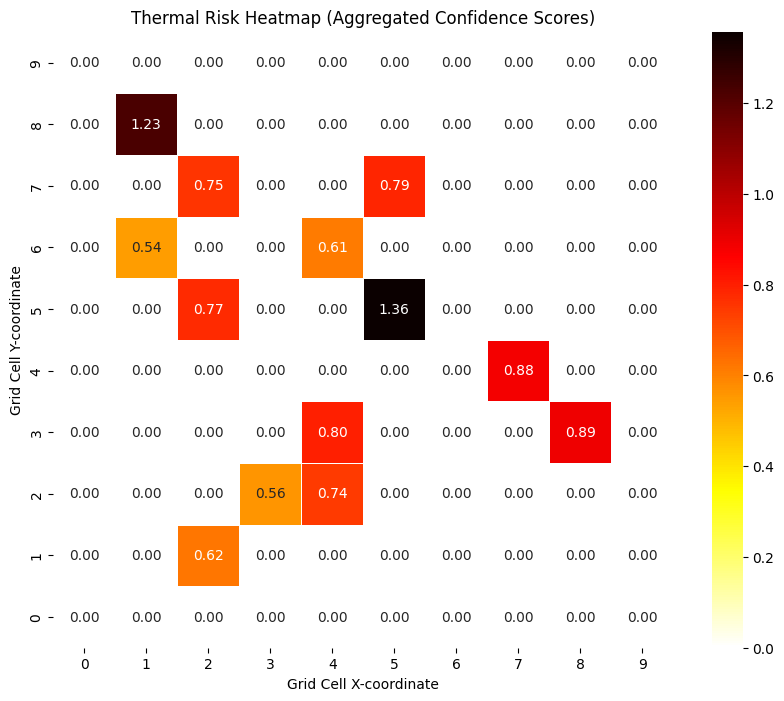

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(thermal_risk_grid, annot=True, cmap='hot_r', fmt=".2f", linewidths=.5)
plt.title('Thermal Risk Heatmap (Aggregated Confidence Scores)')
plt.xlabel('Grid Cell X-coordinate')
plt.ylabel('Grid Cell Y-coordinate')
plt.gca().invert_yaxis()
plt.show()

###Task 4: Power System & Drone Interpretation

###LOW Severity + Isolated (Single Tile, Weak Signal)

* ***Thermal pattern:*** Slight temp rise, low gradient, small hotspot density
* ***Meaning:*** Early aging, minor imbalance, or environmental heating

**Drone Action**
* Routine patrol altitude
* Standard RGB + thermal capture
* No hover required

**Maintenance**
* Log for trend monitoring
* Re-check in next inspection cycle
* No crew dispatch yet

**Goal:** Watch, don’t touch.

### MEDIUM Severity + Isolated

* **Thermal pattern:** Clear max temp spike, moderate gradient, moderate hotspot density
* **Meaning:** Emerging resistive fault (loose clamp, corrosion start)

**Drone Action**
* Reduce altitude
* Hover for multi-angle thermal shots
* Capture zoomed visual imagery

**Maintenance**
* Schedule targeted ground inspection
* Torque check on connectors
* Clean corrosion / tighten hardware

**Goal:** Fix before failure grows.

###MEDIUM Severity + CLUSTERED (Adjacent Tiles)

* **Thermal pattern:** Heat spreading along conductor or across tower section
* **Meaning:** Load imbalance, conductor damage, or progressive joint degradation

**Drone Action**
* Corridor sweep in both directions
* Track heat propagation length
* Capture structural imagery

**Maintenance**

* Dispatch maintenance crew within days
* Inspect entire segment, not just hotspot
* Check conductor strands, sag, and tension

Goal: Stop cascade failure.

###HIGH Severity + Isolated

* **Thermal pattern:** Very high peak temp, sharp gradient, low surrounding temp
* **Meaning:** Critical contact resistance or arcing risk

**Drone Action**

* Immediate close-range inspection

* Thermal video (not just image)

* Check insulator strings and hardware

**Maintenance**

* URGENT crew dispatch

* Possible component replacement

* Temporary load redistribution

**Goal:** Prevent imminent outage or fire.

###HIGH Severity + CLUSTERED (Worst Case)

* **Thermal pattern:** Multiple adjacent hotspots, high density, expanding region
* **Meaning:** System-level stress, conductor damage, or structural overheating

**Drone Action**
* Full tower + span inspection
* Multi-sensor scan (thermal + RGB)
* Document structural integrity

**Maintenance**
* Emergency response
* De-energize if needed
* Replace conductor section / hardware assembly
* Check neighboring towers

**Goal:** Avoid line failure or grid outage.

###Task 5: Reflection

**Limitations:** Review the existing dataset, its features, and the results from the RandomForestClassifier and YOLOv8 training to pinpoint specific limitations relevant to real-world thermal hotspot detection. This will include considering aspects like feature representation, data origin (simulated vs. real), and temporal aspects.

**Propose Improvements with Temporal Monitoring:** Explain how temporal monitoring data can enhance hotspot detection. This includes discussing the value of time-series data for identifying trends, sudden changes, and the evolution of hotspots over time, which are critical for predictive maintenance.
Discuss Integration of Improvements: Outline how the proposed improvements (real thermal imagery and temporal monitoring) can be integrated into the existing machine learning pipeline to build a more robust and effective hotspot detection system.